In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

In [28]:
x = np.random.randn(100,1)
y = 4 + 3* x* x + np.random.randn(100,1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

(100, 1)

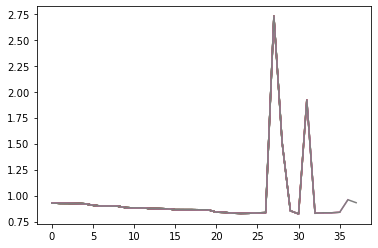

In [42]:
mse = []
for i in range(2,40):
    poly_feature = PolynomialFeatures(degree = i, include_bias = False)
    lin_reg = LinearRegression()
    poly_x = poly_feature.fit_transform(x)
    lin_reg.fit(poly_x,y)
    y_pred = lin_reg.predict(poly_x)
    mse.append(mean_squared_error(y_pred, y))
    plt.plot(np.sqrt(mse))

    

In [44]:
print(min(np.sqrt(mse)))
np.argmin(np.sqrt(mse)) + 1

0.8232242220556195


31

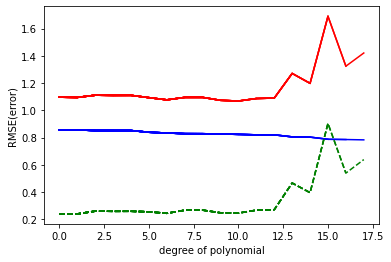

In [64]:
mse_train, mse_test = [],[]
for i in range(2,20):
    poly_feature = PolynomialFeatures(degree = i, include_bias = False)
    lin_reg = LinearRegression()
    poly_x_train = poly_feature.fit_transform(x_train)
    lin_reg.fit(poly_x_train,y_train)
    y_pred_train= lin_reg.predict(poly_x_train)
    mse_train.append(mean_squared_error(y_pred_train, y_train))
    
    poly_x_test = poly_feature.fit_transform(x_test)
    y_pred_test = lin_reg.predict(poly_x_test)
    mse_test.append(mean_squared_error(y_pred_test ,y_test))
    plt.plot(np.sqrt(mse_test),'r')
    plt.plot(np.sqrt(mse_train), 'b')
    plt.plot(np.sqrt(mse_test)-np.sqrt(mse_train),'g--')
    plt.xlabel('degree of polynomial')
    plt.ylabel('RMSE(error)')

In [63]:
print(np.argmin(np.sqrt(mse_test))+1)
print(np.argmin(np.sqrt(mse_train))+1)
print(np.argmin(np.sqrt(mse_test)-np.sqrt(mse_train))+1)

11
18
2


In [71]:

def plot_learning_curve(model,x,y):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3,random_state = 1234)
    mse_train,mse_test = [],[]
    for m in range(1,len(y)):
        model.fit(x_train[:m],y_train[:m])
        y_train_pred = model.predict(x_train[:m])
        mse_train.append(mean_squared_error(y_train[:m],y_train_pred))
        
        y_test_pred = model.predict(x_test[:m])
        mse_test.append(mean_squared_error(y_test[:m],y_test_pred))
        
        plt.plot(np.sqrt(mse_test),'r')
        plt.plot(np.sqrt(mse_train),'b')
        plt.xlabel('trainnig set size')
        plt.ylabel('RMSE')
        plt.title('learning curving with increasing trainning set')
        
    print('rmse for train, test:',np.argmin(np.sqrt(mse_train)),np.argmin(np.sqrt(mse_test)))


rmse for trasin, test: 0 0


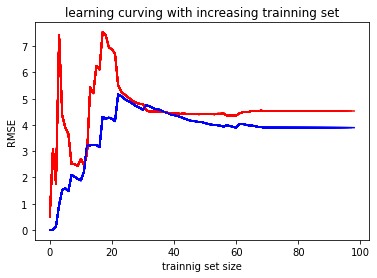

In [72]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

plot_learning_curve(lin_reg,x,y)